
Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за такую хорошую работу, мне она очень понравилась 
- Я оставил некоторые советы, надеюсь они будут полезными или интересными.
* Тебе удалось успешно справиться с текущей задачей. Поздравляю!
* Отправляю проект назад, чтобы у тебя была возможность задать вопросы, если они у тебя есть. Если их нет, то можешь просто отправить проект еще раз и я его зачту.



# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

**ТЗ**

- Изучить файл с телефонными тарифами и создать модель для рекомендации тарифа
- Рассмотреть несколько моделей для решения задачи бинарной классификации
- Деревья решений, Случайный лес, Логистическую регрессиию
- Подобрать гиперпараметры моделей
- На основе метрики accuracy оценить качество модели
- Общий вывод

**Описание данных**

- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='whitegrid')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import warnings
warnings.simplefilter('ignore')

2023-07-21 20:25:04.834605: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что собираешь все импорты в верхней части ноутбука! 
Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
df = pd.read_csv('/Users/kirillkasickij/Downloads/users_behavior.csv', encoding='UTF-8')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
df.shape

(3214, 5)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
calls,3214.0,63.038892,33.236368,0.0,40.0000,62.000,82.0000,244.00
minutes,3214.0,438.208787,234.569872,0.0,274.5750,430.600,571.9275,1632.06
messages,3214.0,38.281269,36.148326,0.0,9.0000,30.000,57.0000,224.00
mb_used,3214.0,17207.673836,7570.968246,0.0,12491.9025,16943.235,21424.7000,49745.73
is_ultra,3214.0,0.306472,0.461100,0.0,0.0000,0.000,1.0000,1.00


In [5]:
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


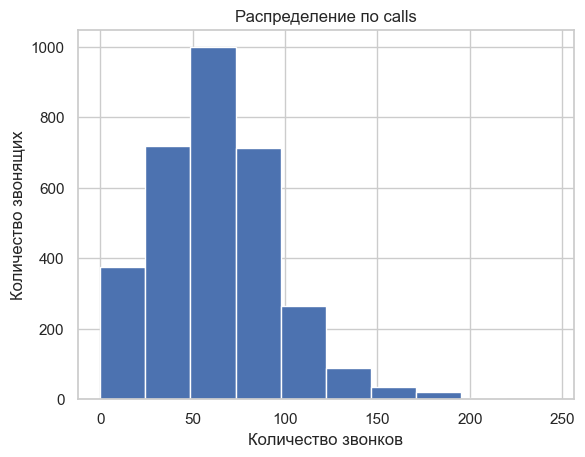

In [7]:
plt.hist(df['calls'], bins=10)
plt.title('Распределение по calls')
plt.ylabel('Количество звонящих')
plt.xlabel('Количество звонков')
plt.grid(True)
plt.show()

**Вывод**

В основном, пользователи совершают 30-70 звонков в месяц. Очень редки случаи на 100+ звонков

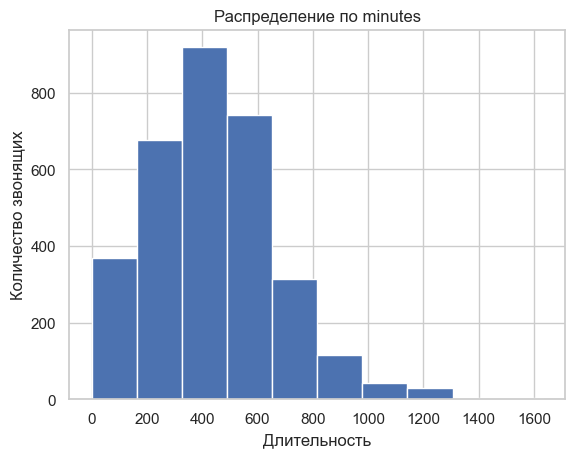

In [8]:
plt.hist(df['minutes'], bins=10)
plt.title('Распределение по minutes')
plt.ylabel('Количество звонящих')
plt.xlabel('Длительность')
plt.grid(True)
plt.show()

**Вывод**

Большинство пользователей расходует 200-600 минут в месяц

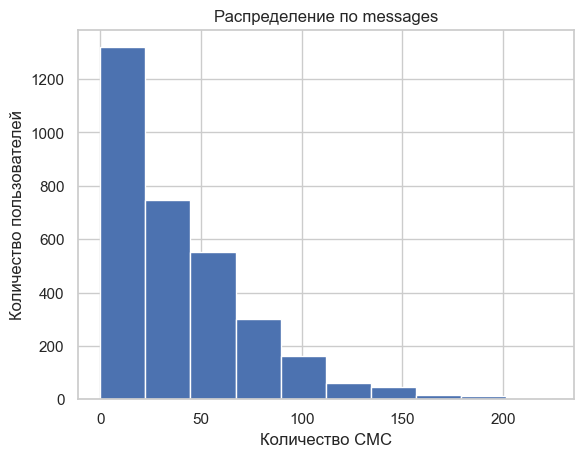

In [9]:
plt.hist(df['messages'], bins=10)
plt.title('Распределение по messages')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество СМС')
plt.grid(True)
plt.show()

**Вывод**

СМС не пользуются особой популярностью. Возможно, это связано с устареванием технологии и доступностю мессенджеров. Проверим это далее

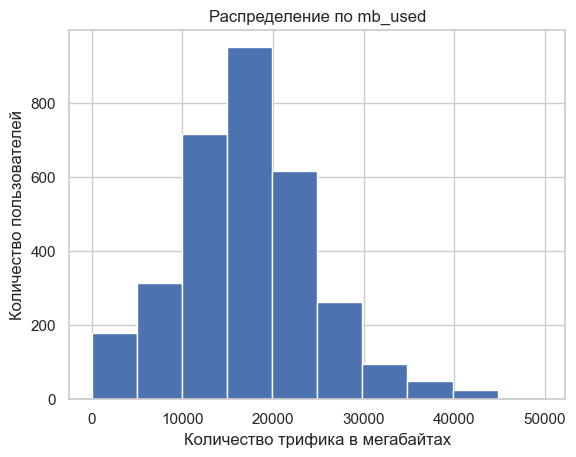

In [10]:
plt.hist(df['mb_used'], bins=10)
plt.title('Распределение по mb_used')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество трифика в мегабайтах')
plt.grid(True)
plt.show()

Действительно, в основном, пользователи расходуют 15000-25000 Мб интернета в месяц, вероятно, на соцсети, что объясняет низкую популярность СМС

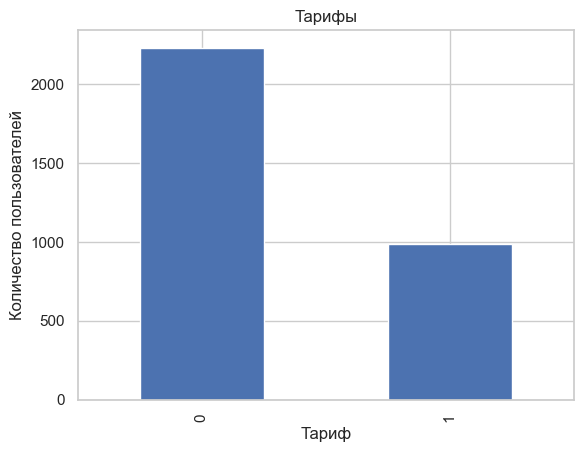

In [11]:
tarif = df['is_ultra'].value_counts()
tarif.plot.bar()
plt.title('Тарифы')
plt.ylabel('Количество пользователей')
plt.xlabel('Тариф')
plt.grid(True)
plt.show()

**Вывод**

Тарифом Ультра пользуются значительно меньше (разница более, чем в 2 раза)

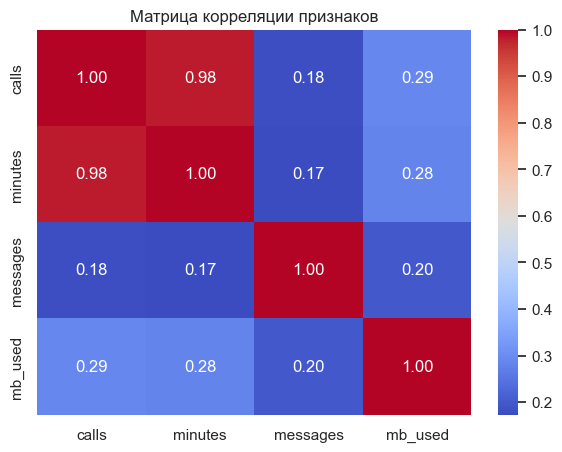

In [12]:
# Хочу посмотреть корреляцию между признаками
# is_ultra удалил, потому что это категориальный признак и корреялция Пирсона не применима к нему
corr_matrix = df.drop('is_ultra', axis=1).corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции признаков')
plt.show()

**Вывод**

- Слабая корреляция между пользованием интернетом и СМС
- Сильная корреляция между количеством звонков и минутами
- Слабая корреляция между звонками и пользованием интернетом, аналогично с минутами


<div class="alert alert-block alert-success">
<b>Успех:</b>  Хороший осмотр данных! Такая корреляция между звонками и минутами - называется мультиколленаиарностью. Если мы удалим один из признаков, это может положительно сказаться на эффективности моделей
</div>


<div class="alert alert-info">
    
<b>Совет:</b> Также  рекомендую посмотреть метод `sns.pairplot` с параметром hue, в который мы передаем целевой признак. 
</div>


**Вывод по разделу**

Мы открыли датасет и изучили основную информацию в нём посредством методов Pandas и визуализации

## Разбейте данные на выборки

In [13]:
# Делим датасет на 3 выборки: обучающую, валидационную и тестовую в соотношении 2:1:1
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

X, X_test, y, y_test = train_test_split(features, 
                                        target, 
                                        random_state=12345, 
                                        test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  random_state=12345,
                                                  test_size=0.3333) #0.25 от общего числа

In [14]:
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}\n'
      f'X_val: {X_val.shape}, y_val: {y_val.shape}\n'
      f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (1606, 4), y_train: (1606,)
X_val: (804, 4), y_val: (804,)
X_test: (804, 4), y_test: (804,)



<div class="alert alert-block alert-success">  
<b>Успех:</b> С разбиением все в порядке, молодец, что не забываешь проверять полученные выборки ,  это иной раз может предостеречь тебя от глупых ошибок.
</div>  


## Исследуйте модели

In [15]:
model_regression = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)

model_regression.fit(X_train, y_train)
y_pred = model_regression.predict(X_val)
accuracy_reg = accuracy_score(y_val, y_pred)
accuracy_reg

0.7375621890547264

**Вывод**

Реграссия показывает неплохой результат, однако, модель всё ещё нуждается в доработке

In [16]:
acc = {}

for depth in range(1, 6):
    model_tree = DecisionTreeClassifier(random_state=12345,
                                        max_depth=depth,
                                        criterion='gini')
    model_tree.fit(X_train, y_train)
    y_pred_tree = model_tree.predict(X_val)
    accuracy_tree = accuracy_score(y_val, y_pred_tree)
    acc.update({depth:accuracy_tree})

acc

{1: 0.7437810945273632,
 2: 0.7699004975124378,
 3: 0.7873134328358209,
 4: 0.7810945273631841,
 5: 0.7798507462686567}

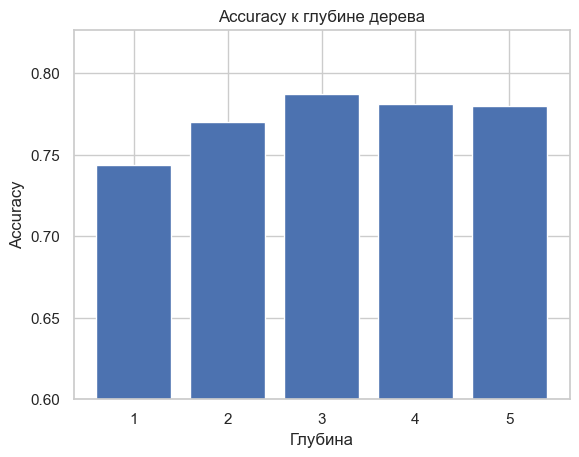

In [17]:
plt.bar(list(acc.keys()), list(acc.values()))
plt.ylim(bottom=0.6)
plt.title('Accuracy к глубине дерева')
plt.xlabel('Глубина')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [18]:
'''model_tree = DecisionTreeClassifier(random_state=12345,
                                        max_depth=3,
                                        criterion='gini')
    model_tree.fit(X_train, y_train)
    y_pred_tree = model_tree.predict(X_val)
    accuracy_tree = accuracy_score(y_val, y_pred_tree'''

"model_tree = DecisionTreeClassifier(random_state=12345,\n                                        max_depth=3,\n                                        criterion='gini')\n    model_tree.fit(X_train, y_train)\n    y_pred_tree = model_tree.predict(X_val)\n    accuracy_tree = accuracy_score(y_val, y_pred_tree"

**Вывод**

Дерево решений показывает результат лучше, чем логистическая регрессия. При глубине дерева = 3, accuracy достигает 0.787

In [19]:
acc_matrix = pd.DataFrame(columns=['Max Depth', 'n_estimators', 'Accuracy'])

for depth in range(1, 6):
    for est in range(1, 6):
        model_forest = RandomForestClassifier(random_state=12345,
                                              max_depth=depth,
                                              n_estimators=est)
        model_forest.fit(X_train, y_train)
        y_tree_forest = model_forest.predict(X_val)
        accuracy_forest = accuracy_score(y_val, y_tree_forest)
        
        acc_matrix = acc_matrix.append({'Max Depth': depth, 
                                        'n_estimators': est, 
                                        'Accuracy': accuracy_forest}, 
                                        ignore_index=True)
        
acc_matrix

,Max Depth,n_estimators,Accuracy
0,1.0,1.0,0.730100
1,1.0,2.0,0.730100
2,1.0,3.0,0.730100
3,1.0,4.0,0.730100
4,1.0,5.0,0.728856
5,2.0,1.0,0.771144
6,2.0,2.0,0.772388
7,2.0,3.0,0.771144
8,2.0,4.0,0.779851
9,2.0,5.0,0.745025


In [20]:
acc_matrix.loc[acc_matrix['Accuracy'].idxmax()]

Max Depth       5.000000
n_estimators    4.000000
Accuracy        0.793532
Name: 23, dtype: float64

**Вывод**

Случайный лес показывает лучший результат: 0.793 при глубине 5 и количестве деревьев 4. Однако, стоить поминть, что большая модель склонна к переобучению, поэтому стоит её проверить.

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо проделан шаг. Радует корректное использование валидационной выборки 
</div>


## Проверьте модель на тестовой выборке

Мы выяснили, что лучший результат показывает Случайный Лес с глубиной 5 и количетсвом деревьев 4. Значит, построим модель с аналогичными геперпараметрами и проверим качество модели уже на тестовой выборке, а не на валидационной.

Если accuracy на валидационной выборке больше, что модель переобучилась

In [21]:
model_forest = RandomForestClassifier(random_state=12345,
                                              max_depth=5,
                                              n_estimators=4)
model_forest.fit(X_train, y_train)

test_prediction_forest = model_forest.predict(X_test)
accuracy_test_forest = accuracy_score(y_test, test_prediction_forest)
accuracy_test_forest

0.7935323383084577

**Вывод**

Accuracy на тестовой выборке получиось аналогичным получившемуся на валидационной выборке. Это значит, что модель не переобучилась и имеет хорошее качество.

<div class="alert alert-block alert-success">
<b>Успех:</b> С тестирование все в порядке.

</div>


<div class="alert alert-block alert-info">
<b>Совет:</b> 
 Перед тестированием можно объединять валидационную и тренировочную выборку в одну обучающую, это может дать нам немного качества  (но не гарантирует этого)<br> 
</div>

In [22]:
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 100)               1100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


2023-07-21 20:25:09.909178: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='acc'
)
history = model_nn.fit(X_train, y_train, epochs=500)
history

Epoch 1/500
51/51 [==============================] - 0s 1ms/step - loss: 796.3441 - acc: 0.4720
Epoch 2/500
51/51 [==============================] - 0s 999us/step - loss: 23.7368 - acc: 0.5915
Epoch 3/500
51/51 [==============================] - 0s 964us/step - loss: 9.2215 - acc: 0.5922
Epoch 4/500
51/51 [==============================] - 0s 947us/step - loss: 7.2909 - acc: 0.5859
Epoch 5/500
51/51 [==============================] - 0s 940us/step - loss: 10.9013 - acc: 0.5604
Epoch 6/500
51/51 [==============================] - 0s 951us/step - loss: 9.8020 - acc: 0.5523
Epoch 7/500
51/51 [==============================] - 0s 953us/step - loss: 13.2777 - acc: 0.5635
Epoch 8/500
51/51 [==============================] - 0s 977us/step - loss: 9.1792 - acc: 0.5704
Epoch 9/500
51/51 [==============================] - 0s 964us/step - loss: 12.0412 - acc: 0.5859
Epoch 10/500
51/51 [==============================] - 0s 942us/step - loss: 9.2538 - acc: 0.5666
Epoch 11/500
51/51 [===============

51/51 [==============================] - 0s 921us/step - loss: 9.9023 - acc: 0.5834
Epoch 86/500
51/51 [==============================] - 0s 923us/step - loss: 8.6837 - acc: 0.5897
Epoch 87/500
51/51 [==============================] - 0s 915us/step - loss: 4.7947 - acc: 0.5971
Epoch 88/500
51/51 [==============================] - 0s 899us/step - loss: 4.0343 - acc: 0.5822
Epoch 89/500
51/51 [==============================] - 0s 895us/step - loss: 4.6048 - acc: 0.5953
Epoch 90/500
51/51 [==============================] - 0s 906us/step - loss: 8.7257 - acc: 0.5909
Epoch 91/500
51/51 [==============================] - 0s 920us/step - loss: 4.7603 - acc: 0.5897
Epoch 92/500
51/51 [==============================] - 0s 926us/step - loss: 10.8811 - acc: 0.5978
Epoch 93/500
51/51 [==============================] - 0s 928us/step - loss: 3.5325 - acc: 0.6183
Epoch 94/500
51/51 [==============================] - 0s 923us/step - loss: 4.3883 - acc: 0.5971
Epoch 95/500
51/51 [======================

51/51 [==============================] - 0s 926us/step - loss: 2.9044 - acc: 0.6308
Epoch 169/500
51/51 [==============================] - 0s 919us/step - loss: 8.5092 - acc: 0.5940
Epoch 170/500
51/51 [==============================] - 0s 910us/step - loss: 6.6953 - acc: 0.5909
Epoch 171/500
51/51 [==============================] - 0s 917us/step - loss: 3.5135 - acc: 0.6034
Epoch 172/500
51/51 [==============================] - 0s 902us/step - loss: 1.8075 - acc: 0.6189
Epoch 173/500
51/51 [==============================] - 0s 918us/step - loss: 9.8534 - acc: 0.5872
Epoch 174/500
51/51 [==============================] - 0s 919us/step - loss: 4.8697 - acc: 0.5909
Epoch 175/500
51/51 [==============================] - 0s 896us/step - loss: 2.8758 - acc: 0.6171
Epoch 176/500
51/51 [==============================] - 0s 919us/step - loss: 4.6839 - acc: 0.5953
Epoch 177/500
51/51 [==============================] - 0s 914us/step - loss: 1.7637 - acc: 0.6532
Epoch 178/500
51/51 [=============

51/51 [==============================] - 0s 1ms/step - loss: 3.8923 - acc: 0.6252
Epoch 253/500
51/51 [==============================] - 0s 981us/step - loss: 5.8622 - acc: 0.6413
Epoch 254/500
51/51 [==============================] - 0s 967us/step - loss: 5.8775 - acc: 0.5753
Epoch 255/500
51/51 [==============================] - 0s 986us/step - loss: 3.5599 - acc: 0.5990
Epoch 256/500
51/51 [==============================] - 0s 960us/step - loss: 1.9072 - acc: 0.6276
Epoch 257/500
51/51 [==============================] - 0s 961us/step - loss: 2.0636 - acc: 0.6644
Epoch 258/500
51/51 [==============================] - 0s 975us/step - loss: 2.4611 - acc: 0.5965
Epoch 259/500
51/51 [==============================] - 0s 1ms/step - loss: 4.1969 - acc: 0.5990
Epoch 260/500
51/51 [==============================] - 0s 986us/step - loss: 1.6692 - acc: 0.6438
Epoch 261/500
51/51 [==============================] - 0s 979us/step - loss: 3.9521 - acc: 0.5984
Epoch 262/500
51/51 [=================

51/51 [==============================] - 0s 940us/step - loss: 1.1960 - acc: 0.6700
Epoch 337/500
51/51 [==============================] - 0s 939us/step - loss: 3.3301 - acc: 0.5934
Epoch 338/500
51/51 [==============================] - 0s 910us/step - loss: 2.4545 - acc: 0.6333
Epoch 339/500
51/51 [==============================] - 0s 926us/step - loss: 2.1356 - acc: 0.6345
Epoch 340/500
51/51 [==============================] - 0s 885us/step - loss: 3.9472 - acc: 0.6021
Epoch 341/500
51/51 [==============================] - 0s 918us/step - loss: 6.1571 - acc: 0.5654
Epoch 342/500
51/51 [==============================] - 0s 910us/step - loss: 2.6991 - acc: 0.6326
Epoch 343/500
51/51 [==============================] - 0s 916us/step - loss: 5.3625 - acc: 0.5946
Epoch 344/500
51/51 [==============================] - 0s 918us/step - loss: 3.4729 - acc: 0.5978
Epoch 345/500
51/51 [==============================] - 0s 899us/step - loss: 2.1170 - acc: 0.6146
Epoch 346/500
51/51 [=============

51/51 [==============================] - 0s 933us/step - loss: 2.0108 - acc: 0.6283
Epoch 420/500
51/51 [==============================] - 0s 941us/step - loss: 1.3342 - acc: 0.6575
Epoch 421/500
51/51 [==============================] - 0s 938us/step - loss: 1.7345 - acc: 0.6252
Epoch 422/500
51/51 [==============================] - 0s 903us/step - loss: 2.9675 - acc: 0.6071
Epoch 423/500
51/51 [==============================] - 0s 913us/step - loss: 3.8441 - acc: 0.5965
Epoch 424/500
51/51 [==============================] - 0s 916us/step - loss: 1.3789 - acc: 0.6669
Epoch 425/500
51/51 [==============================] - 0s 926us/step - loss: 3.2145 - acc: 0.6108
Epoch 426/500
51/51 [==============================] - 0s 903us/step - loss: 7.0205 - acc: 0.5915
Epoch 427/500
51/51 [==============================] - 0s 915us/step - loss: 2.8830 - acc: 0.6283
Epoch 428/500
51/51 [==============================] - 0s 910us/step - loss: 1.2133 - acc: 0.6457
Epoch 429/500
51/51 [=============

In [24]:
history.history.keys()

dict_keys(['loss', 'acc'])

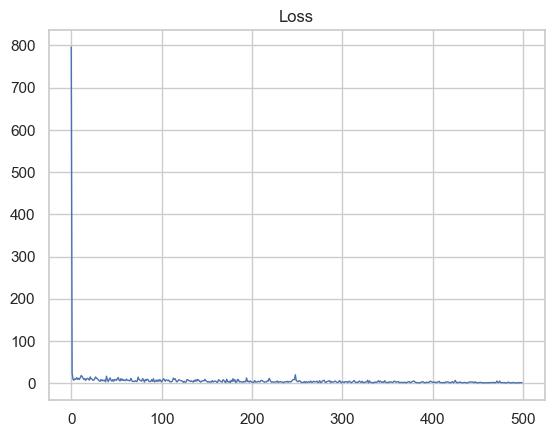

In [25]:
plt.plot(history.epoch, history.history.get('loss'), linewidth=1)
plt.title('Loss')
plt.grid(True)
plt.show()

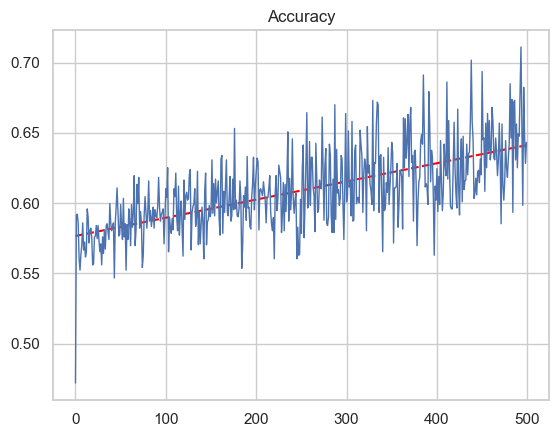

In [26]:
coefficients = np.polyfit(history.epoch, history.history.get('acc'), 1)
trend_line = np.polyval(coefficients, history.epoch)
plt.plot(history.epoch, trend_line, linestyle='dashed', label='Trend', color='red')

plt.plot(history.epoch, history.history.get('acc'), linewidth=1)
plt.title('Accuracy')
plt.grid(True)
plt.show()

**Предсказание на новых данных**

Напишем функцию, которая будет принимать модель и X.
Функция формирует из параметров X двухмерный массив, так как для регрессии в sklearn используется множественная регрессия и на вход должен подаваться двухмерный массив.

In [27]:
def prediction(model, calls, minutes, messages, mb_used):
    features = np.array([calls, minutes, messages, mb_used]).reshape(1, -1)
    prediction = model.predict(features)
    return prediction

In [28]:
prediction(model_forest, 300, 600, 120, 2000)

array([1])

In [29]:
prediction(model_forest, 120, 200, 60, 2000)

array([0])

In [30]:
prediction(model_forest, 120, 300, 50, 20000)

array([0])

**NN model**

In [36]:
prediction(model_nn, 300, 600, 120, 2000).round(2)

1/1 [==============================] - 0s 26ms/step


array([[1.]], dtype=float32)

In [37]:
prediction(model_nn, 120, 200, 60, 2000).round(2)

1/1 [==============================] - 0s 22ms/step


array([[0.01]], dtype=float32)

In [38]:
prediction(model_nn, 120, 300, 50, 20000).round(2)

1/1 [==============================] - 0s 23ms/step


array([[0.]], dtype=float32)

## (бонус) Проверьте модели на адекватность

Чтобы проверить адекватность моделей, воспользуемся методом кросс-валидации

<div class="alert alert-block alert-info">
<b>Совет:</b> Здесь подразумевалось сравнить наши модели с фиктивной/случайной, может нам стоит всегда предсказывать наибольший класс и результат будет не хуже. Для данной задачи удобен инструмент DummyClassifier</div>
</div>


In [34]:
regression_cross_val = cross_val_score(model_regression, X_train, y_train, cv=10)
tree_cross_val = cross_val_score(model_tree, X_train, y_train, cv=10)
forest_cross_val = cross_val_score(model_forest, X_train, y_train, cv=10)

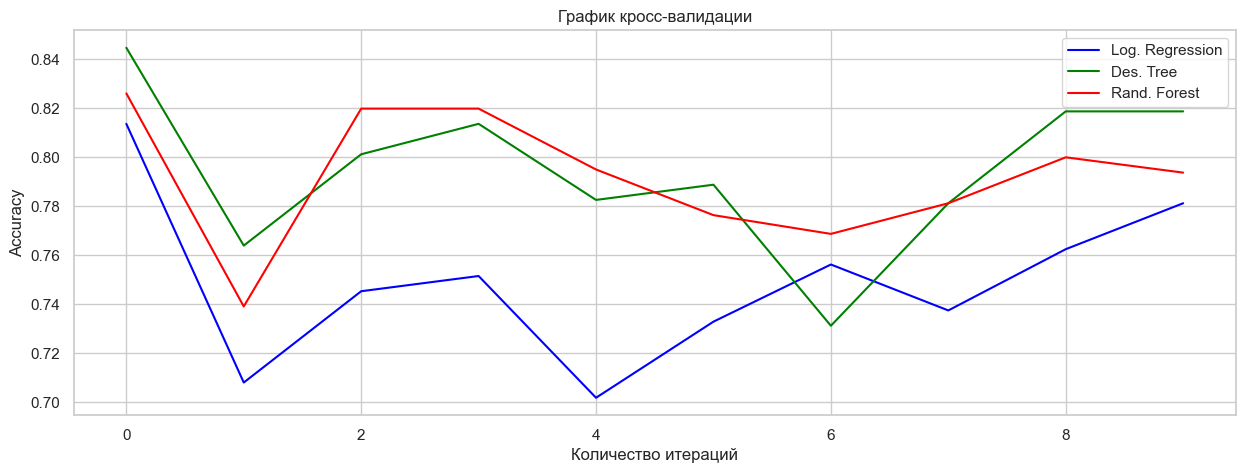

In [35]:
plt.figure(figsize=(15, 5))
plt.plot(regression_cross_val, color='blue')
plt.plot(tree_cross_val, color='green')
plt.plot(forest_cross_val, color='red')
plt.title('График кросс-валидации')
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(['Log. Regression', 'Des. Tree', 'Rand. Forest'])
plt.show()

**Вывод**

Говоря об адекватности моделей, меня несколько смущает, что они начинают обучаться с accuracy уже около 0.8. 

<div class="alert alert-block alert-info">
<b>Совет:</b> А что тебя смущает?) Это же суть кросс-валидации, данные разбиваются по разному на каждой итерации; Усреднее оценок дает более менее объективный результат
</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75


**Общий вывод**

- Нами были изучены данные о пользователях мобильных тарифов. Целью исследование стояло создание алгоритма предсказания рекомендации тарифа пользователю по его параметрам. 
- В качестве моделей, решиющих задачу бинарной классификации рассматривались логистическая регрессия, дерево решений и случайный лес.
- В ходе сравления моделей предпочтение было отдано третьей модели. Далее модель проверялась на тестовой выборке на предмет переобучения.
- Для выбранной модели была написана функция, которая предсказывает класс 0 или 1 на новых данных, поступающих в неё.
- На основе предсказаний на новых данных, мы получили, что человек, совершающий 300 звонков в месяц, расходуя 600 минут, отпраавляя 120 сообщений и расходуя 2000 мб интернета, скорее всего, буджет использовать тариф Ультра. Пользователь с одноимёнными параметрами: 120, 300, 50, 20000, скорее всего, не будет.
- Был построен график кросс-валидации для проверки адекватности моделей, как дополнительное задание.


<div class="alert alert-block alert-success">
<b>Успех:</b> Всегда приятно наблюдать подробный и структурированный итоговый вывод в конце работы!
</div>
